In [1]:
#Project Description

In [2]:
#Action items

- The **gradient** is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. 
- We call our process **gradient descent** because it uses the gradient to descend the loss curve towards a minimum. 
- **Stochastic** means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD! 

# Example 1

In [3]:
'''
Sample code
'''
import time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
def stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="invscaling"):
    """ Computes Ordinary Least SquaresLinear Regression with Stochastic Gradient Descent as the optimization algorithm.
        :param feature_array: array with all feature vectors used to train the model
        :param target_array: array with all target vectors used to train the model
        :param to_predict: feature vector that is not contained in the training set. Used to make a new prediction
        :param learn_rate_type: algorithm used to set the learning rate at each iteration.
        :return: Predicted cooking time for the vector to_predict and the R-squared of the model.
"""    # Pipeline of transformations to apply to an estimator. First applies Standard Scaling to the feature array.
    # Then, when the model is fitting the data it runs Stochastic Gradient Descent as the optimization algorithm.
    # The estimator is always the last element.
    
    start_time = time.time()
    linear_regression_pipeline = make_pipeline(StandardScaler(), SGDRegressor(learning_rate=learn_rate_type))
    
    linear_regression_pipeline.fit(feature_array, target_array)
    stop_time = time.time()
     
    print("Total runtime: %.6fs" % (stop_time - start_time))
    print("Algorithm used to set the learning rate: " + learn_rate_type)
    print("Model Coeffiecients: " + str(linear_regression_pipeline[1].coef_))
    print("Number of iterations: " + str(linear_regression_pipeline[1].n_iter_))    # Make a prediction for a feature vector not in the training set
    prediction = np.round(linear_regression_pipeline.predict(to_predict), 0)[0]
    print("Predicted cooking time: " + str(prediction) + " minutes")    
    r_squared = np.round(linear_regression_pipeline.score(feature_array, target_array).reshape(-1, 1)[0][0], 2)
    print("R-squared: " + str(r_squared))
    


In [5]:
feature_array = [[500, 80, 30, 10],
                 [550, 75, 25, 0],
                 [475, 90, 35, 20],
                 [450, 80, 20,25],
                 [465, 75, 30, 0],
                 [525, 65, 40, 15],
                 [400, 85, 33, 0],
                 [500, 60, 30, 30],
                 [435, 45, 25, 0]]

In [6]:
target_array = [17, 11, 21, 23, 22, 15, 25, 18, 16]

In [7]:
to_predict = [[510, 50, 35, 10]]


In [8]:
stochastic_gradient_descent(feature_array, target_array, to_predict)

Total runtime: 0.003000s
Algorithm used to set the learning rate: invscaling
Model Coeffiecients: [-3.44302967  1.64811415  0.28338234  1.11224984]
Number of iterations: 248
Predicted cooking time: 13.0 minutes
R-squared: 0.9


In [9]:
stochastic_gradient_descent(feature_array, target_array, to_predict)

Total runtime: 0.002001s
Algorithm used to set the learning rate: invscaling
Model Coeffiecients: [-3.4397329   1.64906043  0.28570754  1.10788046]
Number of iterations: 248
Predicted cooking time: 13.0 minutes
R-squared: 0.9


In [10]:
stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="adaptive")

Total runtime: 0.001995s
Algorithm used to set the learning rate: adaptive
Model Coeffiecients: [-3.49286942  1.65371015  0.31132674  1.16091935]
Number of iterations: 95
Predicted cooking time: 13.0 minutes
R-squared: 0.91


'''
With the limitations of Gradient Descent in mind, Stochastic Gradient Descent emerged as a way to tackle performance issues and speed up the convergence in large datasets.

Stochastic Gradient Descent is a probabilistic approximation of Gradient Descent. It is an approximation because, at each step, the algorithm calculates the gradient for one observation picked at random, instead of calculating the gradient for the entire dataset.
'''
src: https://towardsdatascience.com/stochastic-gradient-descent-explained-in-real-life-predicting-your-pizzas-cooking-time-b7639d5e6a32

## Example 2

In [11]:
def gradient_loop(runs=3):
    """ Repeatedly computes the gradient of a function
        Computes the gradient given the starting points and then uses the result of the gradient to feed the next iteration, with new points.
        Prints out the result of the function at each iteration
        :param: runs: number of iterations to compute
    """    # starting points
    x = np.array([1, 2, 3])
    
    # quadratic function, a parabola
    y = x**2
    
    for run in range(0, runs):
        print("Iter " + str(run) + ": Y=" + str(y))        # compute first derivative
        x = np.gradient(y, 1)        # update the function output
        y = x ** 2


In [12]:
gradient_loop(runs=10)

Iter 0: Y=[1 4 9]
Iter 1: Y=[ 9. 16. 25.]
Iter 2: Y=[49. 64. 81.]
Iter 3: Y=[225. 256. 289.]
Iter 4: Y=[ 961. 1024. 1089.]
Iter 5: Y=[3969. 4096. 4225.]
Iter 6: Y=[16129. 16384. 16641.]
Iter 7: Y=[65025. 65536. 66049.]
Iter 8: Y=[261121. 262144. 263169.]
Iter 9: Y=[1046529. 1048576. 1050625.]


# Example 3: Neural Network-Based SGD


In addition to the training data we have, we need two more things:
- A **loss function** that measures how good the network's predictions are. it measures the disparity between the the target's true value and the value the model predicts.
  -- A common loss function for regression problems is the **mean absolute error or MAE**. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).
- An **optimizer** that can tell the network how to change its weights. The optimizer is an algorithm that adjusts the weights to minimize the loss. 
  -- Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent.**  They are iterative algorithms that train a network in steps. One step of training goes like this:

    * Sample some training data and run it through the network to make predictions.
    * Measure the loss between the predictions and the true values.
    * Finally, adjust the weights in a direction that makes the loss smaller.



In [13]:
from IPython.display import Image
Image(url='img/batch-sgd.gif')  

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.
- The pale red dots depict the entire training set, while the solid red dots are the minibatches. 
- Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. 
- We can see that the loss gets smaller as the weights get closer to their true values.


It is also important to note that:
- the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. 
   * A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values. 
- The **learning rate** and the **size of the minibatches** are the two parameters that have the largest effect on how the SGD training proceeds. 
   * Their interaction is often subtle and the right choice for these parameters isn't always obvious. 
- **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

**nb**: Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API

In [14]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('dataset/indexProcessed.csv')
df.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit(df['Index'])
le.classes_

array(['000001.SS', '399001.SZ', 'GDAXI', 'GSPTSE', 'HSI', 'IXIC',
       'J203.JO', 'N100', 'N225', 'NSEI', 'NYA', 'SSMI', 'TWII'],
      dtype=object)

In [16]:
df['Index'] = le.transform(df['Index'])
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,4,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,4,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,4,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,6,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,6,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,6,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,6,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [17]:
#Change the type of data from string to datetime that allows easy handling of time-series analysis. 
df = df.astype({'Date':'datetime64[ns]'})
df['Year'] = df['Date'].dt.year

In [18]:
'''
Pull out the CloseUSD value based on the index and date
'''
def getPrice(x, df):
    df = df.loc[(df['Index']  == x['Index'])  & (df['Date'] == x['Date'])]
    if len(df['CloseUSD'])>0:
        return df['CloseUSD'].values[0]
    return 0

In [19]:
#Look for last day of an year for an Index
df_last_date = df.groupby(['Index', 'Year']).agg({'Date':['max']})

#reduce the column hierarachy to one.
df_last_date.columns = df_last_date.columns.get_level_values(0)

df_last_date.reset_index(inplace = True)


#Look for the price in the main df dataframe for last date of a year for an Index
df['Price'] = df_last_date.apply(lambda x: getPrice(x, df), axis = 1)
df.head(5)    

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
0,4,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,1986,191.056328
1,4,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,1987,183.471992
2,4,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,1987,218.652793
3,4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,1987,331.756328
4,4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,1987,263.355352


In [20]:
df = df.drop(columns=['Date'])
df.dropna(subset = ["Price"], inplace=True)
df.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
0,4,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,1986,191.056328
1,4,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,1987,183.471992
2,4,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,1987,218.652793
3,4,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,1987,331.756328
4,4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,1987,263.355352


In [21]:
# Create training and validation splits
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
366,4,2661.500000,2661.500000,2661.500000,2661.500000,2661.500000,0.0,345.995000,1988,7477.029785
113,4,3133.699951,3133.699951,3133.699951,3133.699951,3133.699951,0.0,407.380994,1987,11481.472676
426,4,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,0.0,316.160000,1988,372.290391
320,4,2591.399902,2591.399902,2591.399902,2591.399902,2591.399902,0.0,336.881987,1988,528.690002


In [22]:
# Split features and target
X_train = df_train.drop('Price', axis=1)
X_valid = df_valid.drop('Price', axis=1)

y_train = df_train['Price']
y_valid = df_valid['Price']

In [23]:
print(X_train.shape)

(304, 9)


In [24]:
X_train

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year
366,4,2661.500000,2661.500000,2661.500000,2661.500000,2661.500000,0.0,345.995000,1988
113,4,3133.699951,3133.699951,3133.699951,3133.699951,3133.699951,0.0,407.380994,1987
426,4,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,0.0,316.160000,1988
320,4,2591.399902,2591.399902,2591.399902,2591.399902,2591.399902,0.0,336.881987,1988
10,4,2559.100098,2559.100098,2559.100098,2559.100098,2559.100098,0.0,332.683013,1987
...,...,...,...,...,...,...,...,...,...
377,4,2744.899902,2744.899902,2744.899902,2744.899902,2744.899902,0.0,356.836987,1988
182,4,3768.399902,3768.399902,3768.399902,3768.399902,3768.399902,0.0,489.891987,1987
388,4,2663.500000,2663.500000,2663.500000,2663.500000,2663.500000,0.0,346.255000,1988
80,4,2659.899902,2659.899902,2659.899902,2659.899902,2659.899902,0.0,345.786987,1987


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[9]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])



Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.


In [26]:
model.compile(
    optimizer='adam',
    loss='mae',
)



Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time *(the batch_size)* and to do that 10 times all the way through the dataset *(the epochs*).


X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s - loss: 3524.5176WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000235912EC040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 2s 1s/step - loss: 3382.5705 - val_loss: 2764.8020
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 2723.9070 - val_loss: 2779.5984
Epoch 3/20
2/2 [==============================] - 0s 76ms/step - loss: 2709.5936 - val_loss: 2757.7451
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 2691.0042 - val_loss: 2779.3411
Epoch 5/20
2/2 [==============================] - 0s 58ms/step - loss: 2698.8441 - val_loss: 2761.0125
Epoch 6/20
2/2 [==============================] - 0s 62ms/step - loss: 2714.5706 - val_loss: 2754.8152
Epoch 7/20
2/2 [==============================] - 0s 66ms/step - loss: 2



We can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The **fit** method in fact keeps a record of the loss produced during training in a **History** object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.


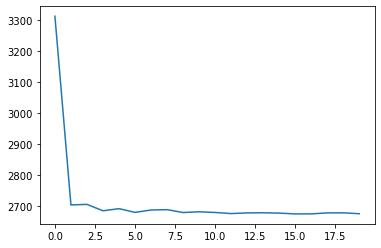

In [28]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.